In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Dataset
weights = np.array([35, 45, 54, 55, 70, 75, 81, 90, 100, 120])
target = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])


In [ ]:
# Train logistic regression model
model = LogisticRegression()
model.fit(weights.reshape(-1,1), target)

# Retrieve learned weights
w0 = model.intercept_[0]  # Bias
w1 = model.coef_[0][0]    # Weight for the feature

print(f"Learned weights: Bias (w0) = {w0:.2f}, Weight (w1) = {w1:.2f}")

Learned weights: Bias (w0) = -6.21, Weight (w1) = 0.10


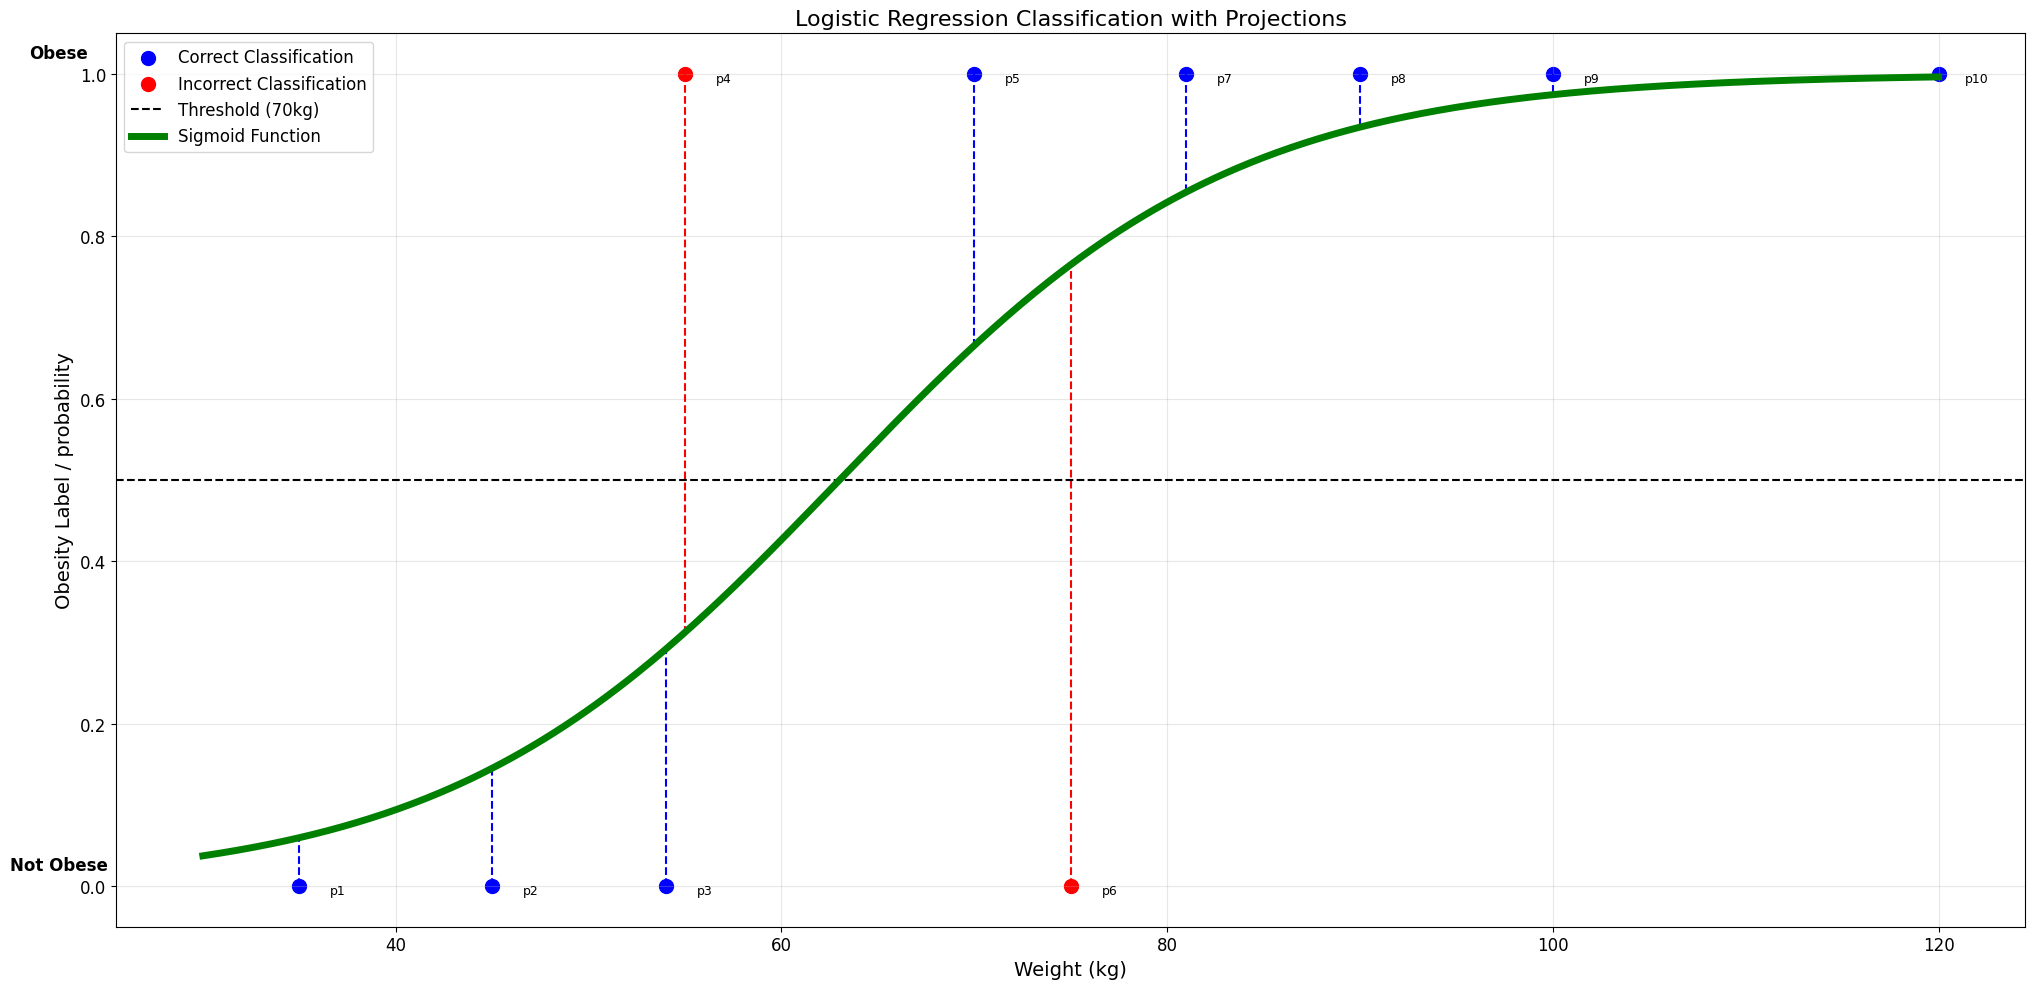

In [ ]:
def sigmoid(x, w0=w0, w1=w1):
    return 1 / (1 + np.exp(-(w0 + w1*x)))

x_range = np.linspace(30, 120, 500)
sigmoid_curve = sigmoid(x_range)

# Predicted labels
predicted_target = [1 if sigmoid(w) >= 0.5 else 0 for w in weights]

# Plot with projections from points to sigmoid

plt.figure(figsize=(20, 10))

# Separate correct and incorrect classifications for legend clarity
for i, (weight, actual, predicted) in enumerate(zip(weights, target, predicted_target)):
    if actual == predicted:
        color = 'blue'
        label = "Correct Classification" if i == 0 else None
    else:
        color = 'red'
        label = "Incorrect Classification" if i == 3 else None

    # Plot point
    plt.scatter(weight, actual, color=color, s=100, label=label)
    plt.text(weight + 2, actual - 0.01, f"p{i+1}", fontsize=9, ha='center')

    # Projection line to sigmoid
    sigmoid_value = sigmoid(weight)
    plt.plot([weight, weight], [actual, sigmoid_value], linestyle='--', color=color, linewidth=1.5)
    # plt.plot([weight, 30], [sigmoid_value, sigmoid_value], linestyle='--', color=color, linewidth=1.5)

# Add threshold line
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1.5, label="Threshold (70kg)")
plt.plot(x_range, sigmoid_curve, label="Sigmoid Function", linewidth=5, color="green")

# Enhancements
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Weight (kg)", fontsize=14)
plt.ylabel("Obesity Label / probability", fontsize=14)
plt.title("Logistic Regression Classification with Projections", fontsize=16)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
# Add text labels for "Not Obese" and "Obese"
plt.text(20, 0.02, "Not Obese", fontsize=12, fontweight='bold')
plt.text(21, 1.02, "Obese", fontsize=12, ha='left', fontweight='bold')

# Show plot
plt.show()


In [ ]:
probabilities = [sigmoid(w, w0, w1) for w in weights]
probabilities

[0.05962628965940003,
 0.14512968801796747,
 0.291739815034866,
 0.31249872745295915,
 0.6657054556700241,
 0.7651732400105352,
 0.8547272577339994,
 0.9345355449907797,
 0.9745038519564345,
 0.9963636018716525]

In [ ]:
fpr, tpr, thresholds = roc_curve(target, probabilities)
thresholds

array([       inf, 0.9963636 , 0.85472726, 0.76517324, 0.31249873,
       0.05962629])

In [ ]:
fpr

array([0.  , 0.  , 0.  , 0.25, 0.25, 1.  ])

In [ ]:
tpr

array([0.        , 0.16666667, 0.66666667, 0.66666667, 1.        ,
       1.        ])

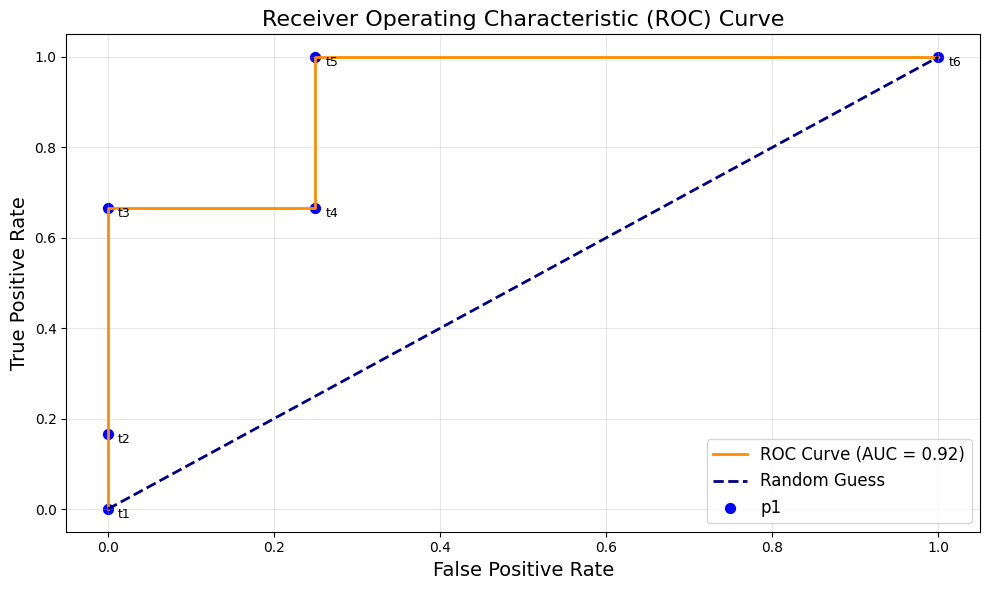

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(target, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")

# Add points for p1-p10
for i, (fp, tp) in enumerate(zip(fpr, tpr)):
    plt.scatter(fp, tp, color='blue', s=50, label=f"p{i+1}" if i == 0 else None)
    plt.text(fp + 0.02, tp - 0.02, f"t{i+1}", fontsize=9, ha='center')

# Enhancements
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()


t3 (Threshold = 0.8547) seems like the best choice for most applications:

- It provides a high TPR=0.6667, meaning the model correctly identifies 66.67% of the actual positives.

- It keeps FPR=0.0, meaning there are no false positives.

- This threshold strikes a balance between sensitivity and specificity without misclassifying negatives.

- It ensures that no negatives are misclassified as positives.
Best for scenarios where false positives are costly, like legal rulings or spam email detection.

- Spam Detection: Missing a few spam emails (false negatives) is acceptable.
Avoiding misclassification of legitimate emails as spam (false positives) is crucial to ensure user trust.

- Legal Applications: In judicial decisions, prioritizing specificity is essential.
Avoiding false accusations (false positives) is more important than missing a few cases (false negatives).

t4 (Threshold = 0.7652)

- Balanced Trade-Off: It is ideal for scenarios where neither false positives nor false negatives are overwhelmingly more critical.
Moderate Sensitivity and Specificity:

- It ensures a reasonable true positive rate without significantly increasing false positives.
Suitable for general-purpose applications where both errors (false positives and false negatives) are undesirable but tolerable.

- Moderate Risk Applications: Applications like customer churn prediction, where both false positives (predicting churn when they donâ€™t) and false negatives (missing actual churners) have moderate impacts.

- General Decision-Making: t4 provides a middle ground when you do not want to overfit your model to either extreme sensitivity or specificity.


t5 (Threshold = 0.3125) if higher sensitivity is required,  could be chosen:

- It achieves TPR=1.0, meaning all positives are correctly identified.

- However, FPR=0.25 indicates some false positives, which might be acceptable in domains like healthcare where missing positives is more costly.

- It ensures that no negatives are misclassified as positives.
Best for scenarios where false positives are costly, like legal rulings or spam email detection.

- Medical Diagnostics: For diseases like cancer or heart conditions, where missing a positive case (false negative) could be life-threatening.
Example: Early-stage cancer screening (better to detect all potential cases, even with some false alarms).

- Fraud Detection: Capturing all potential fraudulent activities is critical, even if it means flagging some legitimate transactions.
Example: Credit card fraud monitoring.

- Safety-Critical Systems:In applications like fire alarms or security systems, it is better to have false alarms than to miss a genuine threat.
